# 1. Introduction

================================================================================================================================================

Name: Ardiansyah Putra Mahadika

Batch: BSD 006

This program aims to analyzing data by comparing ride-hailing pricing, create accurate forecasts of future trip costs, achieving feasibility using available data and modeling "techniques", staying relevant to consumer cost considerations.

================================================================================================================================================

## Background

*Utilizing ride-hailing services for everyday transportation is common, but comparing their pricing could be challenging. To tackle this, we acquired data from two leading ride-hailing companies, Uber and Lyft, sourced from https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma . The main objective is to construct a model capable of predicting trip fares from both companies. This model will empower us to forecast future trip costs and determine which service may offer more economical pricing.*

## Problem Statement

*The goal is to develop a predictive model that forecasts trip fares from Uber and Lyft. This model will enable us to anticipate fares for upcoming trips and assess which company is likely to provide more cost-effective pricing.*

# 2. Libraries

installing required libraries for this project

In [1]:
!pip install feature-engine

In [2]:
!pip install phik

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from phik import phik_matrix
import pickle
import json

/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 3.  Data Loading

- retrieve .csv data from other file

In [4]:
df_ori = pd.read_csv('rideshare_kaggle.csv')
df_ori.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Exploratory Data

- Checking dimension of dataset

In [5]:
df_ori.shape

(693071, 57)

- Checking duplicated data

In [6]:
df_ori.duplicated().any()

False

- Checking missing values

In [7]:
df_ori.isna().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                           True
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [8]:
df_ori.isna().sum().sum()

55095

- Checking data type of each dataset's features

In [9]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

- Checking statistics information of dataset

In [10]:
df_ori.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


- creating copy dataset in order to conduct analyzing and predicting the dataset

In [11]:
df = df_ori.copy(deep=True)

# 4. Explanatory Data Analysis

### Comparing amount of user between Uber and Lyft in November.

In [12]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [13]:
amount_user_df = df.loc[df['month'] == 11].groupby('cab_type')['id'].nunique().reset_index().rename(columns={'id':'count'})
amount_user_df

,cab_type,count
0,Lyft,126925
1,Uber,159532


/var/folders/5r/qgg84vr523s_9ksyqpjzvnfm0000gn/T/ipykernel_11168/1496057373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cab_type', y='count', data=amount_user_df, palette='viridis')


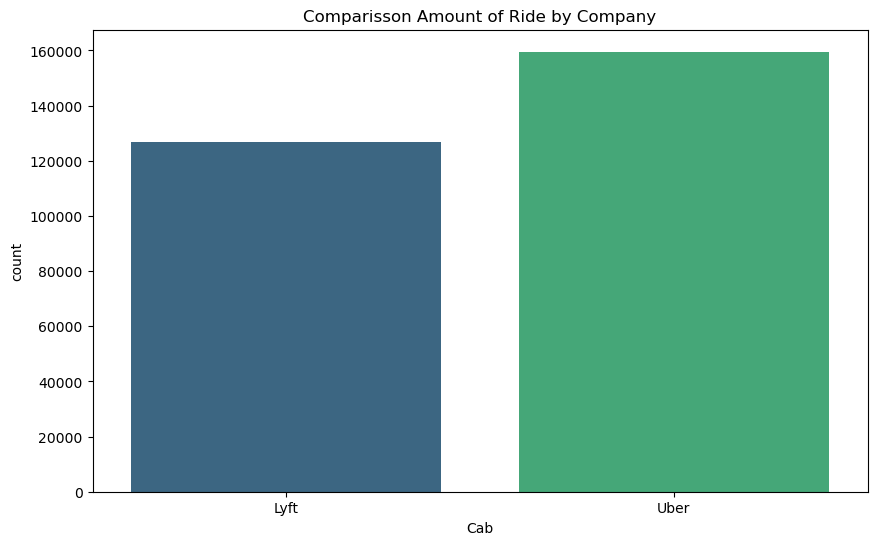

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cab_type', y='count', data=amount_user_df, palette='viridis')
plt.xlabel('Cab')
plt.title('Comparisson Amount of Ride by Company')
plt.show()

__Insight:__


*Based on the data, Uber remains favored among users with 159,532 users compared to 126,925 users.*

### Checking the value distribution of price on each company

In [15]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

#### Lyft Price Distribution

In [16]:
lyft_skewness_price = df.loc[df['cab_type'] == 'Lyft']['price'].skew()
lyft_min_price = df.loc[df['cab_type'] == 'Lyft']['price'].min()
lyft_max_price = df.loc[df['cab_type'] == 'Lyft']['price'].max()
lyft_avg_price = df.loc[df['cab_type'] == 'Lyft']['price'].mean()

print(f'Lyft skewness value of price: {lyft_skewness_price}')
print(f'Lyft minimum amount price: {lyft_min_price}')
print(f'Lyft maximum amount of price: {lyft_max_price}')
print(f'Lyft average value of price: {lyft_avg_price}')

Lyft skewness value of price: 0.9779622794919607
Lyft minimum amount price: 2.5
Lyft maximum amount of price: 97.5
Lyft average value of price: 17.351396125019512


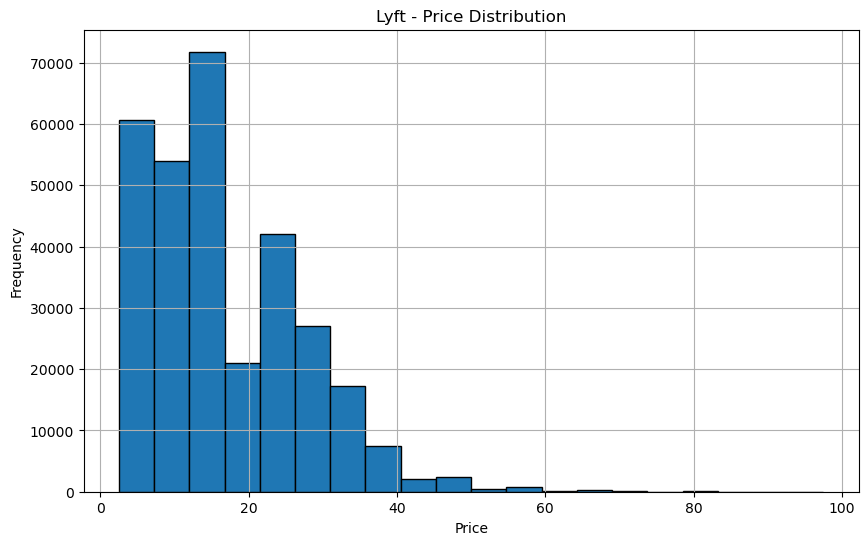

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['cab_type'] == 'Lyft']['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Lyft - Price Distribution')
plt.grid(True)
plt.show()

Text(0.95, 0.9, 'Skewness: 0.98')

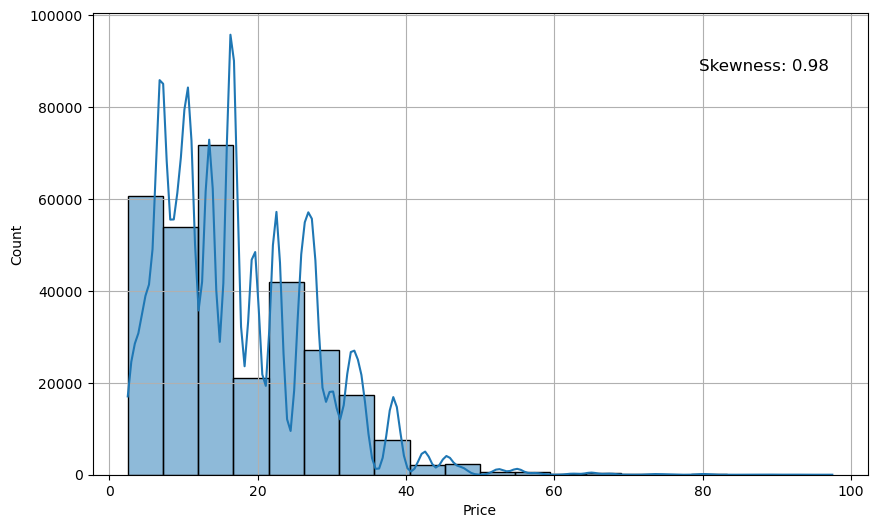

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df.loc[df['cab_type'] == 'Lyft']['price'], kde=True, edgecolor='black', bins=20)
plt.xlabel('Price')
plt.grid(True)
plt.text(0.95, 0.9, f'Skewness: {lyft_skewness_price:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

__Insight:__
- The skewness value of the price distribution is 0.978, indicating that the distribution of prices is moderately skewed to the right.
- The minimum price observed is $2.5, suggesting that some rides were priced relatively low.
- The maximum price observed is $97.5, indicating that some rides were priced quite high.
- The average price is $17.35, providing a typical value around which Lyft prices tend to cluster.
- The data is distributed within the range of $2.5 to $20. This indicates that the majority of Lyft prices fall within this range, with only a few rides having prices below $2.5 or above $20.

#### Uber Price Distribution

In [19]:
uber_skewness_price = df.loc[df['cab_type'] == 'Uber']['price'].skew()
uber_min_price = df.loc[df['cab_type'] == 'Uber']['price'].min()
uber_max_price = df.loc[df['cab_type'] == 'Uber']['price'].max()
uber_avg_price = df.loc[df['cab_type'] == 'Uber']['price'].mean()
uber_mode_price = df.loc[df['cab_type'] == 'Uber']['price'].mode()

print(f'Uber skewness value of price: {uber_skewness_price}')
print(f'Uber minimum amount price: {uber_min_price}')
print(f'Uber maximum amount of price: {uber_max_price}')
print(f'Uber average value of price: {uber_avg_price}')

Uber skewness value of price: 1.0528694623412944
Uber minimum amount price: 4.5
Uber maximum amount of price: 89.5
Uber average value of price: 15.795343166912708


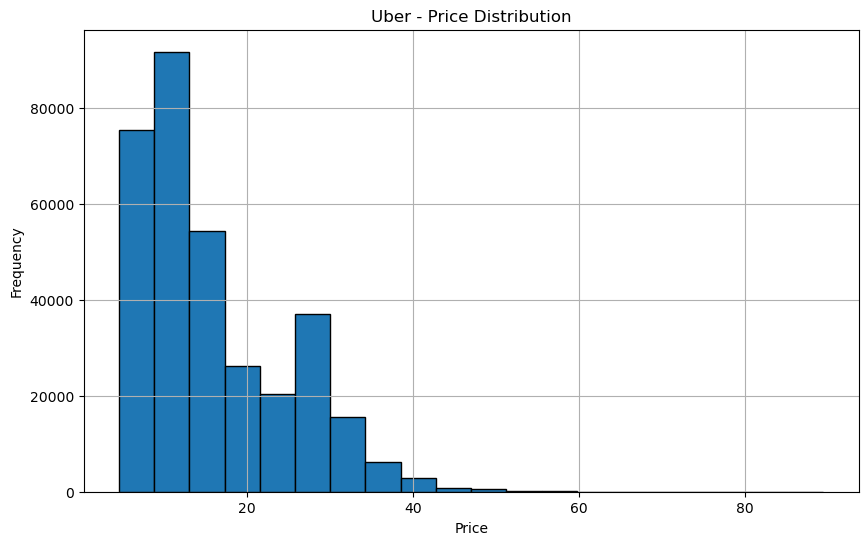

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['cab_type'] == 'Uber']['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Uber - Price Distribution')
plt.grid(True)
plt.show()

Text(0.95, 0.9, 'Skewness: 1.05')

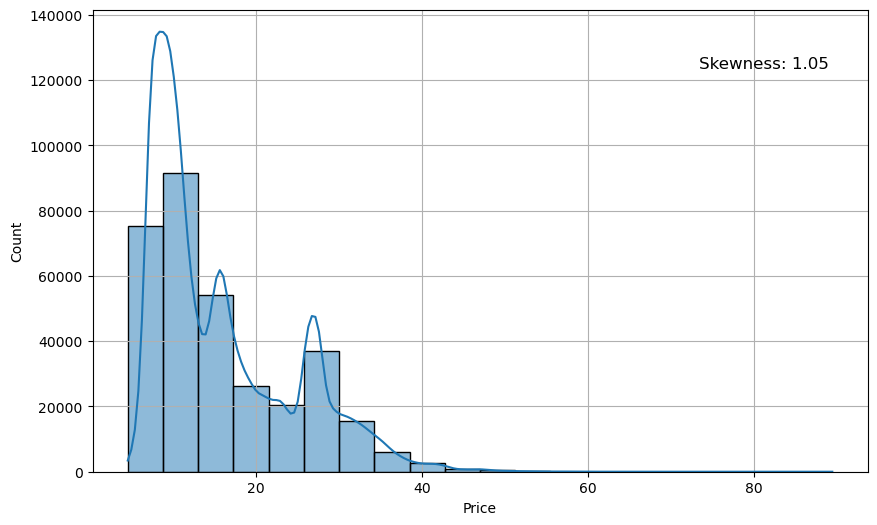

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df.loc[df['cab_type'] == 'Uber']['price'], kde=True, edgecolor='black', bins=20)
plt.xlabel('Price')
plt.grid(True)
plt.text(0.95, 0.9, f'Skewness: {uber_skewness_price:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

__Insight:__
- The skewness value of price (1.053) indicates that the distribution of Uber prices is moderately right-skewed. This suggests that there are more lower-priced rides compared to higher-priced rides, with a tail extending towards higher prices.
- The minimum price observed is $4.5, indicating that even the lowest-priced Uber rides start above this amount.
- The maximum price observed is $89.5, highlighting instances where Uber fares can reach higher amounts, possibly due to surge pricing during peak hours or for longer distances.
- The average price is $15.80, which represents the typical fare paid by Uber riders on average. This average gives an idea of what most Uber rides cost.

### Analyzing the primary locations where rides originate based on the source feature

In [22]:
df['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [23]:
df_source_count = df.groupby('source')['id'].count().sort_values(ascending=False).reset_index().rename(columns={'id':'count'})
df_source_count

,source,count
0,Financial District,58857
1,Theatre District,57813
2,Back Bay,57792
3,Boston University,57764
4,North End,57763
5,Fenway,57757
6,Northeastern University,57756
7,South Station,57750
8,Haymarket Square,57736
9,West End,57562


/var/folders/5r/qgg84vr523s_9ksyqpjzvnfm0000gn/T/ipykernel_11168/1355108932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='source', data=df_source_count, palette='viridis')


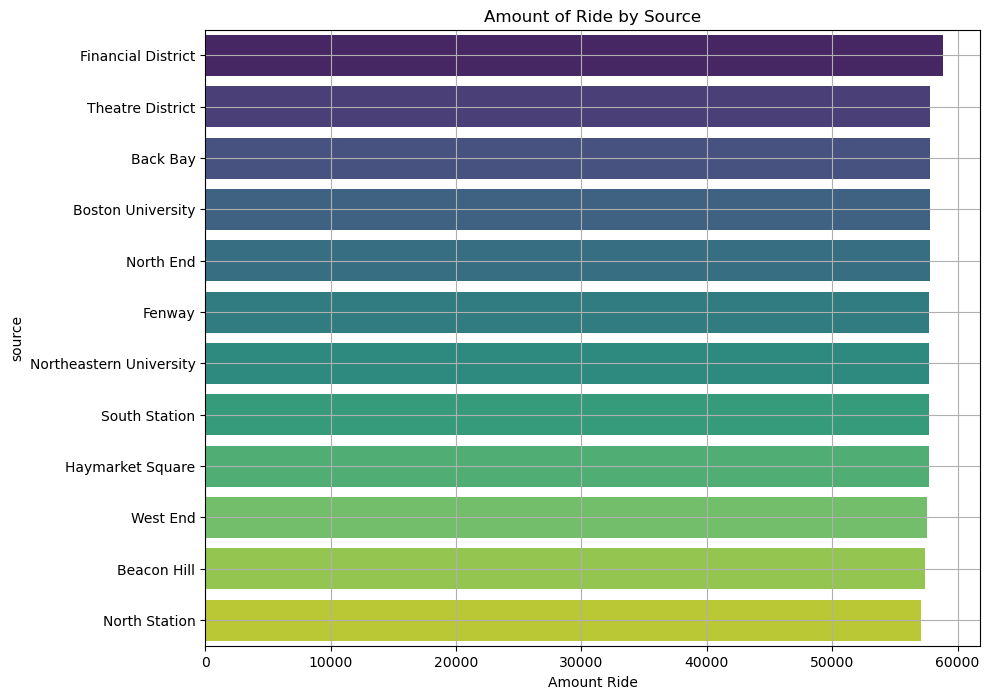

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='source', data=df_source_count, palette='viridis')
plt.xlabel('Amount Ride')
plt.title('Amount of Ride by Source')
plt.grid(True)
plt.show()

__Insight:__

- Based on the huge number of the data, those areas are popular starting points for rides.
- The Financial District, Theatre District, and Back Bay have the highest ride counts, each approximately around 57,800 rides.
- The North Station has the lowest count among the listed locations, with approximately 57,100 rides.

### Comparison of the number of ride users during rush hour and non-rush hour

In [25]:
df['hour'].unique()

array([ 9,  2,  1,  4,  3, 18,  5, 19,  6, 10, 16, 22, 23,  0, 14, 11,  7,
       20, 13,  8, 12, 21, 17, 15])

In [26]:
df['is_rush_hour'] = df['hour'].apply(lambda x: 'yes' if 14 <= x < 21 else 'no')
df['is_rush_hour']

0         no
1         no
2         no
3         no
4         no
          ..
693066    no
693067    no
693068    no
693069    no
693070    no
Name: is_rush_hour, Length: 693071, dtype: object

In [27]:
busy_hour_df = df.groupby('is_rush_hour')['id'].count().sort_values().reset_index().rename(columns={'id': 'count'})
busy_hour_df

,is_rush_hour,count
0,yes,206256
1,no,486815


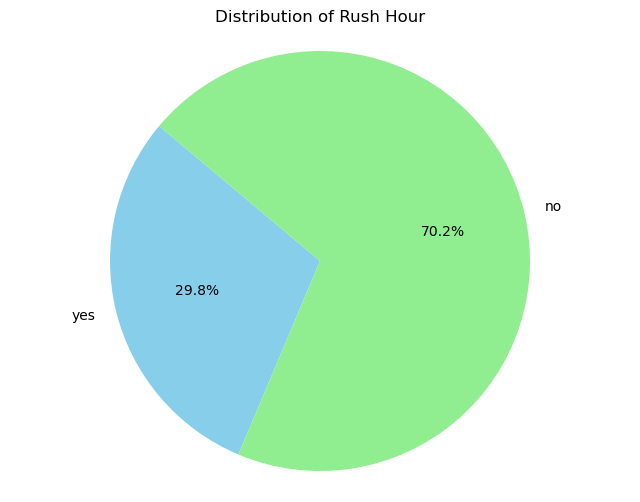

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Rush Hour')
plt.pie(busy_hour_df['count'], labels=busy_hour_df['is_rush_hour'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.axis('equal')
plt.show()

__Insight:__

- Frequency during Rush Hour: There were 206,256 rides that occurred during rush hour. This indicates a significant portion of rides took place during peak traffic times, likely in urban areas where rush hours are well-defined.

- Frequency outside Rush Hour: The majority of rides, 486,815, occurred outside of rush hour periods. This suggests that the demand for rides is spread throughout the day, not just during peak traffic times.

In [29]:
del df['is_rush_hour']

- removing unnecessary columns that are not needed for the analysis, particularly.

# 5. Feature Engineering

In [30]:
X = df.drop('price', axis=1)
y = df[['price']]

- Splitting dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 22)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)

Train size :  (554456, 56)
Test size :  (138615, 56)


## Handling Missing Value

- Is there any missing value in train dataset?

In [32]:
X_train.isna().sum().sum()

0

In [33]:
y_train.isna().sum().sum()

44002

- Handling missing value

In [34]:
y_train_null = y_train[y_train.isna()['price'] == True]
X_train.drop(y_train_null.index, inplace=True)
y_train.dropna(inplace=True)

- Is there any missing value in test dataset?

In [35]:
X_test.isna().sum().sum()

0

In [36]:
y_test.isna().sum().sum()

11093

- Handling missing value in test dataset

In [37]:
y_test_null = y_test[y_test.isna()['price'] == True]
X_test.drop(y_test_null.index, inplace=True)
y_test.dropna(inplace=True)

In [38]:
X_test.shape

(127522, 56)

In [39]:
y_test.shape

(127522, 1)

## Handling Outliers

- initiate function to show diagram and graphic the distribution on feature selected

In [40]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Distance - Before Capping


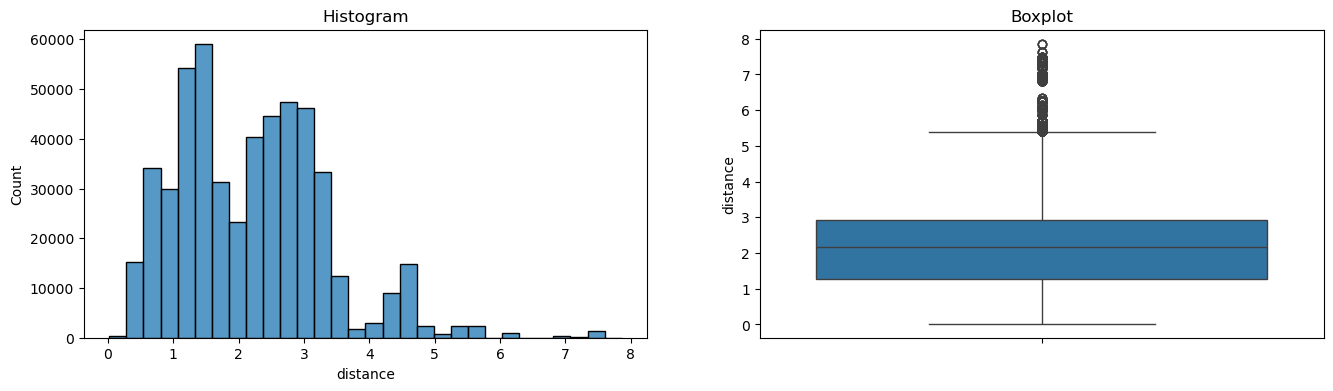

In [41]:
print('Distance - Before Capping')
diagnostic_plots(X_train, 'distance')

- create iterations to display statistical information and to determine establish capping datas based on this statistical information for each feature.

In [42]:
for column in X_train.select_dtypes(include=np.number).columns.tolist():
    skewness = X_train[column].skew()
    print(f'== {column.upper()} ==')
    print(f'Skewness value of {column}: {skewness}')
    
    if skewness > 1 or skewness < -1:
        q3 = X_train[column].quantile(0.75)
        q1 = X_train[column].quantile(0.25)
        iqr = q3 - q1 
        lower_bound = q1 - 3*iqr
        upper_bound = q3 + 3*iqr
    elif -0.5 <= skewness <= 0.5:
        lower_bound = X_train[column].mean() - 3 * X_train[column].std()
        upper_bound = X_train[column].mean() + 3 * X_train[column].std()
    else:
        q1 = X_train[column].quantile(0.25)
        q3 = X_train[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
    outliers = X_train[column].loc[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    outliers_percentage = len(outliers) / len(X_train) * 100
    
    print(f'Number of outliers in {column}: {len(outliers)}')
    print(f'Percentage of outliers: {outliers_percentage:.5f}%')
    
    if outliers_percentage <= 5 and column != 'surge_multiplier':
        if skewness > 1 or skewness < -1:
            winsorizered = Winsorizer(capping_method='iqr', tail='both', fold='auto', variables=[column])
        elif -0.5 <= skewness <= 0.5:
            winsorizered = Winsorizer(capping_method='gaussian', tail='both', fold='auto', variables=[column])
        else:
            winsorizered = Winsorizer(capping_method='iqr', tail='both', fold='auto', variables=[column])
            
        print(f'Before Winsorizing {column}:')
        print(f'{X_train[column].describe()}\n')
        
        X_train[column] = winsorizered.fit_transform(X_train[[column]])[column]
        
        print(f'After Winsorizing {column}:')
        print(f'{X_train[column].describe()}\n')
        
    else:
        print(f'{X_train[column].describe()}\n')

        

== TIMESTAMP ==
Skewness value of timestamp: 0.4302366594894864
Number of outliers in timestamp: 0
Percentage of outliers: 0.00000%
Before Winsorizing timestamp:
count    5.104540e+05
mean     1.544047e+09
std      6.896733e+05
min      1.543204e+09
25%      1.543444e+09
50%      1.543737e+09
75%      1.544828e+09
max      1.545161e+09
Name: timestamp, dtype: float64

After Winsorizing timestamp:
count    5.104540e+05
mean     1.544047e+09
std      6.896733e+05
min      1.543204e+09
25%      1.543444e+09
50%      1.543737e+09
75%      1.544828e+09
max      1.545161e+09
Name: timestamp, dtype: float64

== HOUR ==
Skewness value of hour: -0.04536061390485785
Number of outliers in hour: 0
Percentage of outliers: 0.00000%
Before Winsorizing hour:
count    510454.000000
mean         11.616671
std           6.944873
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: hour, dtype: float64

After Winsorizing hour:
count    51

Distance - After Capping


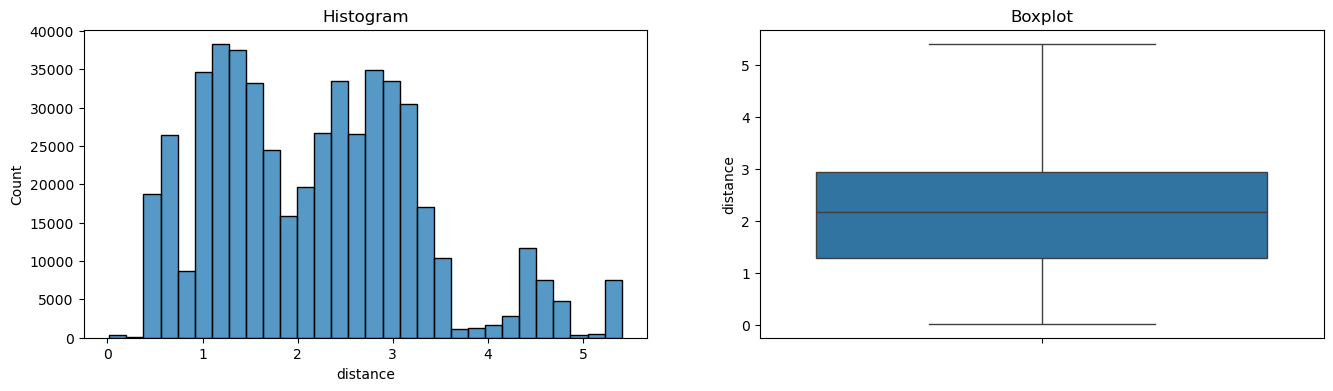

In [43]:
print('Distance - After Capping')
diagnostic_plots(X_train, 'distance')


- splitting dataset for inference purporses

In [44]:
X_sample, X_inference, y_sample, y_inference = train_test_split(X_test, y_test, test_size=0.005, random_state=2)

print('inf size : ', X_inference.shape)
print('inf size : ', y_inference.shape)

inf size :  (638, 56)
inf size :  (638, 1)


## Feature Selection

#### To predict the price, removing the following features which are having no correlation on the trip's cost

- Checking features (columns) of dataset

In [45]:
X_train.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 

- __id column has no correlation with calculation of price__

In [46]:
X_train = X_train.drop(['id'],axis=1)
X_train.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'appar

- __Due the timezone feature only has one value, we can drop the column and assume that the dataset was located in New York__

In [47]:
X_train['timezone'].unique()


array(['America/New_York'], dtype=object)

In [48]:
X_train = X_train.drop(['timezone'], axis=1)
X_train.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatu

- __Checking redundancy value of the feature related to datetime__

Extracting year value from datetime

In [49]:
X_train['year'] = X_train['datetime'].apply(lambda x: x.split('-')[0])
X_train['year'].unique()

array(['2018'], dtype=object)

Since the year column is only has one value of year, we be able to assume that the dataset was in 2018

In [50]:
X_train = X_train.drop(['year','datetime'],axis = 1)
X_train.columns

Index(['timestamp', 'hour', 'day', 'month', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],

- adjusting X_test features

In [51]:
X_test = X_test[X_train.columns]
X_test.shape

(127522, 53)

- Checking temperature features which have strong correlation with price

In [52]:
df_temperature = pd.concat([X_train, y_train], axis=1)

df_temperature = df_temperature[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                                 'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

df_temperature.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
128880,38.5,32.31,28.18,44.66,35.04,43.99,35.69,31.71,1543690800,44.66,28.060,43.99
362718,12.5,36.99,32.27,44.66,35.04,43.99,35.69,31.71,1543690800,44.66,28.060,43.99
524601,18.5,35.98,31.03,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.110,35.75
420464,9.0,19.28,13.96,33.92,27.05,32.95,24.47,18.05,1544731200,33.92,16.405,32.95
208847,15.0,40.87,37.73,54.29,38.48,53.62,34.85,39.74,1544896800,54.29,37.040,53.62


In [53]:
df_temperature.corr()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
price,1.000000,0.000121,0.000250,-0.000034,0.000271,0.000284,0.000825,0.000002,0.001176,-0.000180,-0.000046,0.000110
temperature,0.000121,1.000000,0.946113,0.788558,0.502803,0.710394,0.383362,0.789784,-0.257464,0.780366,0.825440,0.703036
apparentTemperature,0.000250,0.946113,1.000000,0.821536,0.574877,0.811719,0.496631,0.697682,-0.233679,0.792342,0.787416,0.782179
temperatureHigh,-0.000034,0.788558,0.821536,1.000000,0.612312,0.958718,0.535479,0.795144,-0.232343,0.985913,0.881727,0.950982
temperatureLow,0.000271,0.502803,0.574877,0.612312,1.000000,0.630027,0.933973,0.472311,-0.366677,0.568027,0.627085,0.579922
apparentTemperatureHigh,0.000284,0.710394,0.811719,0.958718,0.630027,1.000000,0.602915,0.665122,-0.219536,0.926219,0.793598,0.974135
apparentTemperatureLow,0.000825,0.383362,0.496631,0.535479,0.933973,0.602915,1.000000,0.283511,-0.401124,0.492686,0.470161,0.558715
temperatureMin,0.000002,0.789784,0.697682,0.795144,0.472311,0.665122,0.283511,1.000000,-0.310667,0.783273,0.963133,0.647993
temperatureHighTime,0.001176,-0.257464,-0.233679,-0.232343,-0.366677,-0.219536,-0.401124,-0.310667,1.000000,-0.189656,-0.360139,-0.160759
temperatureMax,-0.000180,0.780366,0.792342,0.985913,0.568027,0.926219,0.492686,0.783273,-0.189656,1.000000,0.853414,0.956305


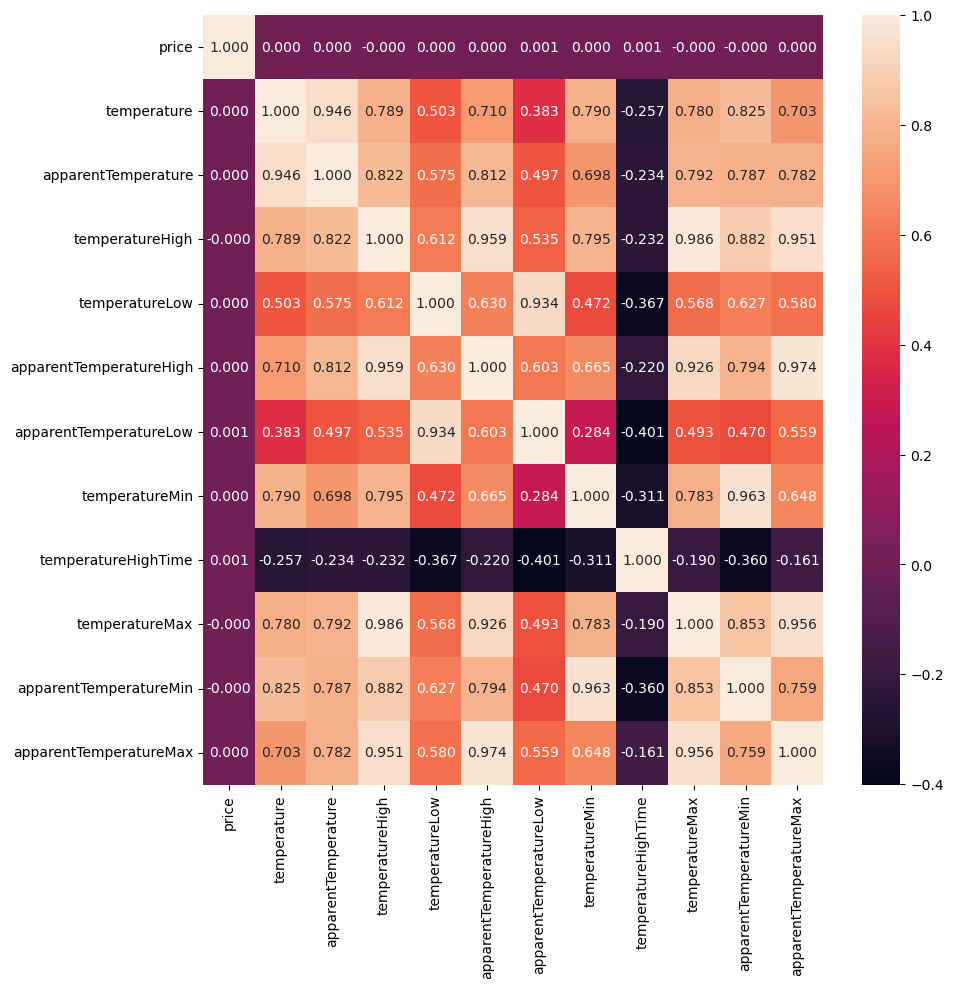

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df_temperature.corr(), annot=True, fmt=".3f")
plt.show()

since the price column and temperature things have weak correaltion, removing temperature related column

In [55]:
X_train.drop(df_temperature.columns[1:], axis=1, inplace=True)
X_test.drop(df_temperature.columns[1:], axis=1, inplace=True)

In [56]:
print(f'{X_train.shape}')
print(f'{X_test.shape}')

(510454, 42)
(127522, 42)


- Checking is the climate features has strong correlation with price

In [57]:
df_climate = pd.concat([X_train, y_train], axis=1)
df_climate = df_climate[['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust', 'visibility', 
                         'dewPoint', 'pressure', 'windBearing','cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase','precipIntensityMax']]
df_climate.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
128880,38.5,0.0,0.0,0.79,4.24,4.75,9.850,26.59,1021.74,320,0.67,0,9.850,281.4,0.82,0.0000
362718,12.5,0.0,0.0,0.68,5.87,6.26,9.910,27.53,1022.32,344,0.44,1,9.910,280.1,0.82,0.0000
524601,18.5,0.0,0.0,0.70,5.92,5.92,9.843,27.26,991.62,264,0.44,0,9.843,348.0,0.72,0.0001
420464,9.0,0.0,0.0,0.57,3.60,3.60,9.868,6.46,1028.56,345,0.04,0,9.868,325.9,0.21,0.0001
208847,15.0,0.0,0.0,0.70,4.68,5.77,9.827,32.00,1024.46,36,0.14,0,9.827,296.6,0.27,0.0082


In [58]:
df_climate.corr()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
price,1.000000,0.000439,-0.000461,-0.000735,0.000064,0.000208,0.001170,-0.000200,0.001210,-0.001818,0.001524,-0.001173,0.001170,0.000057,-0.001886,0.001275
precipIntensity,0.000439,1.000000,0.838316,0.417416,0.306820,0.207086,-0.600789,0.338845,-0.143974,-0.432745,0.288741,-0.098666,-0.600789,-0.222472,0.078558,0.497780
precipProbability,-0.000461,0.838316,1.000000,0.548806,0.251420,0.135692,-0.762035,0.445597,-0.179885,-0.469599,0.387137,-0.070447,-0.762035,-0.235196,0.085007,0.582499
humidity,-0.000735,0.417416,0.548806,1.000000,-0.208047,-0.299675,-0.697432,0.747559,-0.134085,-0.356398,0.479553,-0.206878,-0.697432,-0.426620,0.147515,0.519110
windSpeed,0.000064,0.306820,0.251420,-0.208047,1.000000,0.942198,-0.035893,-0.075997,-0.574287,0.113446,0.159962,0.066389,-0.035893,0.545081,0.040919,0.212267
windGust,0.000208,0.207086,0.135692,-0.299675,0.942198,1.000000,0.034760,-0.158966,-0.526939,0.164513,0.106469,0.092661,0.034760,0.583980,0.013378,0.109653
visibility,0.001170,-0.600789,-0.762035,-0.697432,-0.035893,0.034760,1.000000,-0.579711,0.228224,0.401139,-0.477542,0.119259,1.000000,0.262686,-0.173860,-0.544212
dewPoint,-0.000200,0.338845,0.445597,0.747559,-0.075997,-0.158966,-0.579711,1.000000,-0.308714,-0.359312,0.500419,-0.003095,-0.579711,-0.425543,0.316499,0.505895
pressure,0.001210,-0.143974,-0.179885,-0.134085,-0.574287,-0.526939,0.228224,-0.308714,1.000000,-0.280538,-0.285042,0.005229,0.228224,-0.451042,-0.527969,-0.244018
windBearing,-0.001818,-0.432745,-0.469599,-0.356398,0.113446,0.164513,0.401139,-0.359312,-0.280538,1.000000,-0.221315,0.114081,0.401139,0.346094,0.262655,-0.554393


In [59]:
X_train.drop(df_climate.columns[1:], axis=1, inplace=True)
X_test.drop(df_climate.columns[1:], axis=1, inplace=True)

In [60]:
print(f'{X_train.shape}')
print(f'{X_test.shape}')

(510454, 27)
(127522, 27)


In [61]:
X_train.drop(['timestamp','latitude','longitude','product_id','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis = 1, inplace=True)

X_test.drop(['timestamp','latitude','longitude','product_id','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis = 1, inplace=True)

In [62]:
print(f'{X_train.shape}')
print(f'{X_test.shape}')

(510454, 11)
(127522, 11)


- Checking correaltion between datetime with price

In [63]:
df_datetime = pd.concat([X_train, y_train], axis=1)
df_datetime = df_datetime[['price','hour','day','month']]
df_datetime.head()

,price,hour,day,month
128880,38.5,11,1,12
362718,12.5,14,1,12
524601,18.5,13,28,11
420464,9.0,6,13,12
208847,15.0,2,16,12


In [64]:
df_datetime.corr()

,price,hour,day,month
price,1.000000,0.000578,-0.001503,0.001673
hour,0.000578,1.000000,0.066441,-0.079412
day,-0.001503,0.066441,1.000000,-0.861131
month,0.001673,-0.079412,-0.861131,1.000000


since the datetime columns has weak correlation with price, i decide to drop the columns

In [65]:
X_train.drop(df_datetime.columns[1:], axis=1, inplace=True)
X_test.drop(df_datetime.columns[1:], axis=1, inplace=True)

In [66]:
print(f'{X_train.shape}')
print(f'{X_test.shape}')

(510454, 8)
(127522, 8)


In [67]:
X_train_temp = pd.concat([y_train, X_train], axis=1)
X_train_temp.columns

Index(['price', 'source', 'destination', 'cab_type', 'name', 'distance',
       'surge_multiplier', 'short_summary', 'icon'],
      dtype='object')

In [68]:
cat_col = X_train.select_dtypes(include=object).columns.tolist()
cat_col

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']

In [69]:
X_train_temp

,price,source,destination,cab_type,name,distance,surge_multiplier,short_summary,icon
128880,38.5,Northeastern University,Financial District,Lyft,Lyft XL,3.05,2.0,Mostly Cloudy,partly-cloudy-night
362718,12.5,Theatre District,Haymarket Square,Uber,UberXL,1.61,1.0,Partly Cloudy,partly-cloudy-day
524601,18.5,Boston University,West End,Uber,UberXL,3.04,1.0,Partly Cloudy,partly-cloudy-day
420464,9.0,North Station,Boston University,Uber,UberPool,3.01,1.0,Clear,clear-night
208847,15.0,South Station,North Station,Uber,UberXL,2.29,1.0,Partly Cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...
219638,10.5,Theatre District,Fenway,Lyft,Lyft,3.12,1.0,Mostly Cloudy,partly-cloudy-night
120166,21.5,Beacon Hill,Northeastern University,Uber,Black,2.56,1.0,Mostly Cloudy,partly-cloudy-night
549220,22.5,Boston University,Beacon Hill,Lyft,Lux Black,2.67,1.0,Mostly Cloudy,partly-cloudy-night
162752,7.0,Fenway,West End,Lyft,Shared,2.84,1.0,Mostly Cloudy,partly-cloudy-night


In [70]:
correlation_matrix = X_train_temp.phik_matrix()
print(correlation_matrix['price'])

interval columns not set, guessing: ['price', 'distance', 'surge_multiplier']


/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


price               1.000000
source              0.159374
destination         0.155152
cab_type            0.125740
name                0.679210
distance            0.436066
surge_multiplier    0.348648
short_summary       0.000000
icon                0.000000
Name: price, dtype: float64


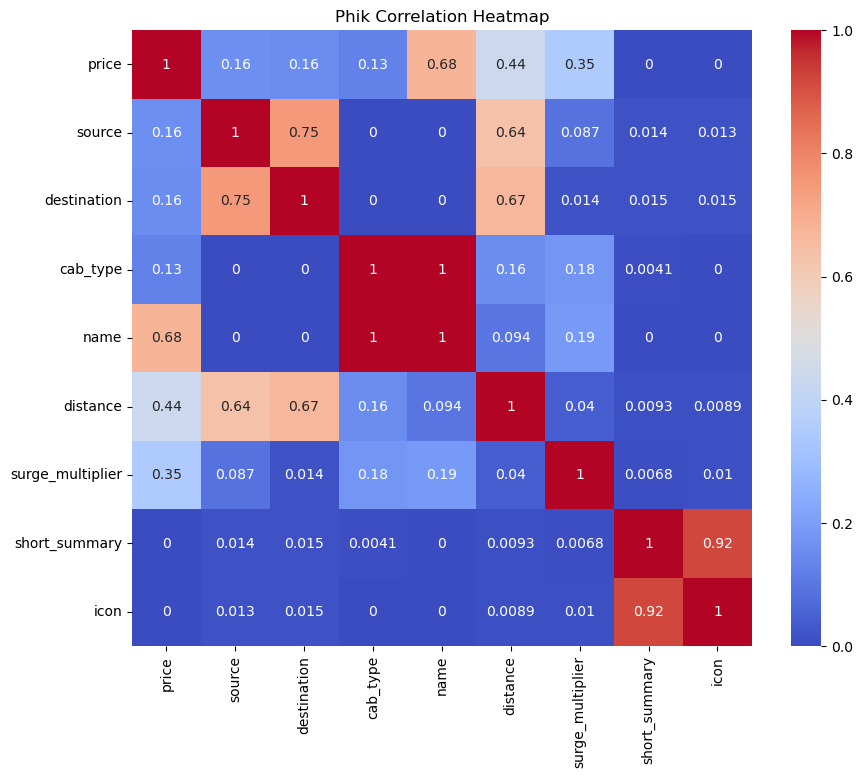

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Phik Correlation Heatmap')
plt.show()

There are 3 features that have significant correlation with price, which are name, distance, and surge_multiplier. So i decide to drop the rest of features

In [72]:
weak_corr_feat = ['source','destination','cab_type','short_summary','icon']
X_train.drop(X_train[weak_corr_feat], axis=1, inplace=True)
X_test.drop(X_test[weak_corr_feat], axis=1, inplace=True)

In [73]:
print(f'{X_train.shape}')
print(f'{X_test.shape}')

(510454, 3)
(127522, 3)


## Splitting Data

In [74]:
X_train.columns

Index(['name', 'distance', 'surge_multiplier'], dtype='object')

- Convert surge_multiplier column into catagory datatype

In [75]:
X_train['surge_multiplier'].unique()

array([2.  , 1.  , 1.25, 1.5 , 1.75, 2.5 , 3.  ])

In [76]:
X_test['surge_multiplier'].unique()

array([1.25, 1.  , 2.  , 1.5 , 1.75, 2.5 , 3.  ])

In [77]:
cat_type = CategoricalDtype(categories=[1,1.25,1.5,2,2.5,3],ordered=True)

invalid_values = X_train[~X_train['surge_multiplier'].isin(cat_type.categories)]
if not invalid_values.empty:    
    X_train.loc[~X_train['surge_multiplier'].isin(cat_type.categories), 'surge_multiplier'] = 1
    
    
invalid_values_test = X_test[~X_test['surge_multiplier'].isin(cat_type.categories)]
if not invalid_values_test.empty:    
    X_test.loc[~X_test['surge_multiplier'].isin(cat_type.categories), 'surge_multiplier'] = 1
    
    
X_train['surge_multiplier'] = X_train['surge_multiplier'].astype(cat_type)
X_test['surge_multiplier'] = X_test['surge_multiplier'].astype(cat_type)

In [78]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols_nom = X_train.select_dtypes(include=object).columns.tolist()
cat_cols_ord = X_train.select_dtypes(include=['category']).columns.tolist()

num_cols_test = X_test.select_dtypes(include=np.number).columns.tolist()
cat_cols_nom_test = X_test.select_dtypes(include=object).columns.tolist()
cat_cols_ord_test = X_test.select_dtypes(include=['category']).columns.tolist()

In [79]:
print(f'numerical columns   : {num_cols}')
print(f'categorical columns nominal: {cat_cols_nom}')
print(f'categorical columns ordinal: {cat_cols_ord}')

numerical columns   : ['distance']
categorical columns nominal: ['name']
categorical columns ordinal: ['surge_multiplier']


In [80]:
print(f'numerical columns   : {num_cols_test}')
print(f'categorical columns nominal: {cat_cols_nom_test}')
print(f'categorical columns ordinal: {cat_cols_ord_test}')

numerical columns   : ['distance']
categorical columns nominal: ['name']
categorical columns ordinal: ['surge_multiplier']


- assigning a new variable based on relevance feature

In [81]:
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols_test]

X_train_cat = X_train[cat_cols_nom]
X_test_cat = X_test[cat_cols_nom]

X_train_cat_ord = X_train[cat_cols_ord]
X_test_cat_ord = X_test[cat_cols_ord_test]

## Cardinality Check

In [82]:
for column in X_train_cat:
    print(f'{column}: {X_train_cat[column].unique()} ({X_train_cat[column].nunique()})')
    if X_train_cat[column].nunique() < 10:
        print(f'-- {column} column has low cardinality --\n')
    else:
        print(f'-- {column} column has high cardinality --\n')

name: ['Lyft XL' 'UberXL' 'UberPool' 'Lyft' 'Lux Black' 'WAV' 'Black' 'Shared'
 'Black SUV' 'UberX' 'Lux Black XL' 'Lux'] (12)
-- name column has high cardinality --



## Feature Scalling

- to scale and normalize data to a specific range (0 - 1)

In [83]:
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

- converting into pandas dataframe

In [84]:
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_scaled_df = pd.DataFrame(X_test_num_scaled, columns=num_cols_test)

In [85]:
print(f'train: {X_train_num_scaled}')
print(f'test: {X_test_num_scaled}')

train: [[0.56267409]
 [0.29526462]
 [0.56081708]
 ...
 [0.49210771]
 [0.52367688]
 [0.62952646]]
test: [[0.19684308]
 [0.09470752]
 [0.25812442]
 ...
 [0.14113278]
 [0.62581244]
 [0.28783658]]


In [86]:
np.isnan(X_train_num_scaled).sum()

0

In [87]:
np.isnan(X_test_num_scaled).sum()

0

## Feature Encoding

### Ordinal Encoding

- checking unique value of ordinal category feature's value

In [88]:
X_train_cat_ord['surge_multiplier'].unique()

[2.00, 1.00, 1.25, 1.50, 2.50, 3.00]
Categories (6, float64): [1.00 < 1.25 < 1.50 < 2.00 < 2.50 < 3.00]

In [89]:
X_test_cat_ord['surge_multiplier'].unique()

[1.25, 1.00, 2.00, 1.50, 2.50, 3.00]
Categories (6, float64): [1.00 < 1.25 < 1.50 < 2.00 < 2.50 < 3.00]

- encoding ordinal category value with OrdinalEncoder()

In [90]:
encoder = OrdinalEncoder(categories = [[1. , 1.25, 1.5,2. ,2.5 ,3. ]], handle_unknown='use_encoded_value', unknown_value=-1)
encoded_X_train_cat_ord = encoder.fit_transform(X_train_cat_ord)
encoded_X_test_cat_ord = encoder.transform(X_test_cat_ord)


- convert into pandas dataframe

In [91]:
X_train_encoded_ord_df = pd.DataFrame(encoded_X_train_cat_ord, columns=cat_cols_ord)
X_test_encoded_ord_df = pd.DataFrame(encoded_X_test_cat_ord, columns=cat_cols_ord_test)

In [92]:
X_test_encoded_ord_df['surge_multiplier'].unique()

array([1., 0., 3., 2., 4., 5.])

- checking missing value after encoded

In [93]:
np.isnan(encoded_X_train_cat_ord).sum()

0

In [94]:
np.isnan(encoded_X_test_cat_ord).sum()

0

### Nominal Encoding (One Hot Encoding)

- encoding nominal categorical data type with OneHotEncoder()

In [95]:
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_X_train_cat = ohe.fit_transform(X_train_cat).toarray()
encoded_X_test_cat = ohe.transform(X_test_cat).toarray()

- get features name after encoded the feature selected

In [96]:
feature_names_train = ohe.get_feature_names_out(input_features=X_train_cat.columns)
feature_names_test = ohe.get_feature_names_out(input_features=X_test_cat.columns)

- convert into pandas dataframe

In [97]:
X_train_encoded_df = pd.DataFrame(encoded_X_train_cat, columns=feature_names_train)
X_test_encoded_df = pd.DataFrame(encoded_X_test_cat, columns=feature_names_test)

- make sure that there is no missing value

In [98]:
np.isnan(encoded_X_train_cat).sum()

0

In [99]:
np.isnan(encoded_X_test_cat).sum()

0

### Concatenate Dataset

- concate numpy array

In [100]:
X_train_final = np.concatenate([X_train_num_scaled, encoded_X_train_cat, encoded_X_train_cat_ord], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, encoded_X_test_cat, encoded_X_test_cat_ord], axis = 1)

- converting into pandas dataframe by concating those 3 dataframe coverted

In [101]:
X_train_final = pd.concat([X_train_scaled_df,X_train_encoded_df,X_train_encoded_ord_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df,X_test_encoded_df,X_test_encoded_ord_df], axis=1)

# 6. Model Definition

In [102]:
model = LinearRegression()

*Deciding to use Linear regression due the main target variable is price which has numerical datatype (continuous). The objective is to predict the relationship between ride-hailing prices and features such as distance, surge multiplier, etc. Evaluating the model using mean absolute error and R2 score metrics.*

# 7. Model Training

In [103]:
model.fit(X_train_final, y_train)

LinearRegression()

In [104]:
intercept = model.intercept_
slope = model.coef_.ravel() 

params = {
    'feature': X_train_final.columns[:len(slope)], 
    'slope': slope.tolist() 
}

print(f'Intercept: {intercept}')
print(f'Slope: {slope}')

pd.DataFrame(params)


Intercept: [2.29323465e+13]
Slope: [ 1.55558243e+01 -2.29323465e+13 -2.29323465e+13 -2.29323465e+13
 -2.29323465e+13 -2.29323465e+13 -2.29323465e+13 -2.29323465e+13
 -2.29323465e+13 -2.29323465e+13 -2.29323465e+13 -2.29323465e+13
 -2.29323465e+13  5.18750000e+00]


,feature,slope
0,distance,1.555582e+01
1,name_Black,-2.293235e+13
2,name_Black SUV,-2.293235e+13
3,name_Lux,-2.293235e+13
4,name_Lux Black,-2.293235e+13
5,name_Lux Black XL,-2.293235e+13
6,name_Lyft,-2.293235e+13
7,name_Lyft XL,-2.293235e+13
8,name_Shared,-2.293235e+13
9,name_UberPool,-2.293235e+13


__Insight:__

*The huge number of intercept, approximately 2.29e+13, indicates the 'baseline' prediction when all features are 0. The slope (coefficient) reflects the effect (weight) of each feature on the predicted price. The coefficient of the distance feature, 15.56, signifies a positive influence on the price prediction. The large negative coefficients (-2.29e+13) for other features suggest potential issues with their scaling in the model, requiring further review and processing. The coefficient for the last feature, surge_multiplier, at 5.19, indicates an additional positive influence on the price prediction.*

# 8. Model Evaluation

In [105]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)
y_pred_train

array([[32.7890625 ],
       [14.05078125],
       [18.1796875 ],
       ...,
       [23.890625  ],
       [ 7.91796875],
       [13.33984375]])

In [106]:
X_train_final.head()

,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,surge_multiplier
0,0.562674,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.295265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.560817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.555246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.421541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [107]:
print(f'Error - Train set : {mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'Error - Test set {mean_absolute_error(y_test, y_pred_test):.2f}')

Error - Train set : 1.82
Error - Test set 1.82


In [108]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared score - Train Set: {r2_train:.2f}")
print(f"R-squared score - Test Set: {r2_test:.2f}")


R-squared score - Train Set: 0.92
R-squared score - Test Set: 0.92


*The MAE and R2 evaluation metrics suggest that the model performs well in predicting ride fares, with accurate predictions and a strong ability to explain price variability based on the selected features. These findings support the model's effectiveness in real-world applications within the ride-hailing industry.*

__Statement:__

- Evaluation result by using Mean Absolute Error find a value of 1.82 for both the training and test sets, indicating a well-fitted model (good fit). It means that if the fare for a 2.7 km trip is $31.5, the model be able to predict a price around $31.

- Considering R2, both the training and test scores approach 1 with a value of 0.92, signifying that our model effectively captures a significant portion of the variance in the features related to the target variable, price.

# 9. Model Saving

- saving features and models required to conduct prediction on infefrence model file

In [109]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols_test, file_1)

with open('list_cat_cols_nom.txt', 'w') as file_2:
  json.dump(list(cat_cols_nom_test), file_2)

with open('list_cat_cols_ord.txt', 'w') as file_3:
  json.dump(cat_cols_ord_test, file_3)

with open('model_scaler.pkl', 'wb') as file_4:
  pickle.dump(scaler, file_4)

with open('model_encoder.pkl', 'wb') as file_5:
  pickle.dump(encoder, file_5)

with open('model_ohe.pkl', 'wb') as file_6:
  pickle.dump(ohe, file_6)

with open('model_lin_reg.pkl', 'wb') as file_7:
  pickle.dump(model, file_7)


# 10. Model Inference

- export data set for inference purposes 

In [110]:
with open('X_inference.txt', 'w') as file_8:
  json.dump(X_inference.to_dict(orient='records'), file_8)

with open('y_inference.txt', 'w') as file_9:
  json.dump(y_inference.to_dict(orient='records'), file_9)

# 11. Pengambilan Kesimpulan

Based on a thorough analysis of the ride-hailing price prediction model and associated data, several key insights emerge. Uber maintains a dominant user base compared to Lyft, indicating strong consumer preference. Price distribution typically ranges from $2.5 to $20, consistent with standard fare structures in ride-hailing services. Certain areas such as the Financial District and Theatre District stand out with higher ride counts, highlighting popular starting points. During rush hours, there is a notable increase in ride demand, underscoring significant operational impacts.

The linear regression model demonstrates robust performance with a Mean Absolute Error (MAE) of approximately $1.82 across both training and test sets, suggesting accurate fare predictions. A high R-squared score of 0.92 reinforces the model's ability to effectively explain fare variability based on the selected features. Continuous refinement and optimization of the model and its features are recommended to further enhance predictive accuracy and operational efficiency in the dynamic ride-hailing industry landscape.